# Wooldrige Chap3_c10

In [18]:
#讀入HTV資料
import pandas as pd
import numpy as np
HTV= pd.read_csv("HTV.csv")
HTV.head()

wage      abil  educ  ne  nc  west  south  exper  motheduc  fatheduc  \
0  12.019231  5.027738    15   0   0     1      0      9        12        12   
1   8.912656  2.037170    13   1   0     0      0      8        12        10   
2  15.514334  2.475895    15   1   0     0      0     11        12        16   
3  13.333333  3.609240    15   1   0     0      0      6        12        12   
4  11.070110  2.636546    13   1   0     0      0     15        12        15   

   ...  ne18  nc18  south18  west18  urban18    tuit17     tuit18     lwage  \
0  ...     1     0        0       0        1  7.582914   7.260242  2.486508   
1  ...     1     0        0       0        1  8.595144   9.499537  2.187472   
2  ...     1     0        0       0        1  7.311346   7.311346  2.741764   
3  ...     1     0        0       0        1  9.499537  10.162070  2.590267   
4  ...     1     0        0       0        1  7.311346   7.311346  2.404249   

   expersq     ctuit  
0       81 -0.322671  
1       64  0.904392  
2      121  0.000000  
3       36  0.662534  
4      225  0.000000  

[5 rows x 23 columns]

In [19]:
from scipy import stats
def descriptive_statistics(x) : 
    return pd.Series([x.count(),x.min(),x.max(),x.mean()],index=['count','min','max','mean'])
descriptive_statistics(HTV.educ)

count    1230.000000
min         6.000000
max        20.000000
mean       13.037398
dtype: float64

In [20]:
fliter = (HTV["educ"] == 12)
HTV[fliter]

wage      abil  educ  ne  nc  west  south  exper  motheduc  \
7     11.667099 -0.133598    12   0   0     0      1     14        12   
9     11.538462 -0.338460    12   1   0     0      0      9        14   
10    14.814815  1.380710    12   1   0     0      0     13         9   
11    20.699173  3.412799    12   1   0     0      0     14        12   
25    11.057693  1.112235    12   1   0     0      0      8         9   
...         ...       ...   ...  ..  ..   ...    ...    ...       ...   
1217   6.726458  3.715002    12   0   0     0      1     16        12   
1218   3.301321  2.630618    12   1   0     0      0      9        12   
1222   4.656578  1.757988    12   0   0     1      0     15        12   
1224   9.615385  1.726616    12   0   1     0      0      9        12   
1225   7.735584  2.803173    12   0   0     0      1      9        12   

      fatheduc  ...  ne18  nc18  south18  west18  urban18     tuit17  \
7           12  ...     1     0        0       0        1   7.394907   
9           12  ...     1     0        0       0        1   5.851309   
10          10  ...     1     0        0       0        1   7.394907   
11          16  ...     1     0        0       0        1   7.394907   
25          12  ...     1     0        0       0        1   6.053333   
...        ...  ...   ...   ...      ...     ...      ...        ...   
1217        16  ...     1     0        0       0        0  11.155029   
1218        12  ...     1     0        0       0        1   9.769236   
1222         8  ...     0     1        0       0        1   9.692757   
1224        11  ...     0     1        0       0        1   9.349703   
1225        12  ...     0     0        1       0        1   3.895709   

         tuit18     lwage  expersq     ctuit  
7      7.394907  2.456773      196  0.000000  
9      6.053333  2.445686       81  0.202024  
10     7.394907  2.695628      169  0.000000  
11     7.394907  3.030094      196  0.000000  
25     6.125471  2.403126       64  0.072138  
...         ...       ...      ...       ...  
1217  11.155029  1.906049      256  0.000000  
1218   9.343459  1.194323       81 -0.425776  
1222   9.692757  1.538281      225  0.000000  
1224  10.444347  2.263364       81  1.094645  
1225   3.810777  2.045831       81 -0.084932  

[512 rows x 23 columns]

In [21]:
#寫法1
print("The percentage of tewlfth grade",512/1230)

The percentage of tewlfth grade 0.416260162601626


In [22]:
#寫法2
import statistics
mean = statistics.mean(fliter)
print("The percentage of tewlfth grade",mean)

The percentage of tewlfth grade 0.416260162601626


In [23]:
import statistics
mean = statistics.mean(HTV.motheduc)
mean1 = statistics.mean(HTV.fatheduc)
print("The average of the motheduc",mean,
      "The average of the fatheduc",mean1)

The average of the motheduc 12.178048780487805 The average of the fatheduc 12.447154471544716


In [25]:
import statsmodels.api as sm
# 迴歸分析 應變數是educ 自變數是motheduc fatheduc
pairf=pd.concat([HTV.motheduc,HTV.fatheduc],axis = 1)
model=sm.OLS(HTV.educ,sm.add_constant(pairf)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   educ   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     203.7
Date:                Sun, 16 May 2021   Prob (F-statistic):           4.13e-77
Time:                        16:06:30   Log-Likelihood:                -2621.7
No. Observations:                1230   AIC:                             5249.
Df Residuals:                    1227   BIC:                             5265.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9644      0.320     21.776      0.0

In [27]:
import statsmodels.api as sm
# 迴歸分析 應變數是educ 自變數是motheduc fatheduc abil
pairf=pd.concat([HTV.motheduc,HTV.fatheduc,HTV.abil],axis = 1)
model=sm.OLS(HTV.educ,sm.add_constant(pairf)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   educ   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     305.2
Date:                Sun, 16 May 2021   Prob (F-statistic):          5.95e-148
Time:                        16:06:39   Log-Likelihood:                -2455.0
No. Observations:                1230   AIC:                             4918.
Df Residuals:                    1226   BIC:                             4938.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4487      0.290     29.180      0.0

In [29]:
abil=pd.concat([HTV.abil])
abilsqu=abil*abil
# 迴歸分析 應變數是educ 自變數是motheduc fatheduc abil abil^2
pairf=pd.concat([HTV.motheduc,HTV.fatheduc,HTV.abil,abilsqu],axis = 1)
model=sm.OLS(HTV.educ,sm.add_constant(pairf)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   educ   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     244.9
Date:                Sun, 16 May 2021   Prob (F-statistic):          1.34e-154
Time:                        16:06:47   Log-Likelihood:                -2436.6
No. Observations:                1230   AIC:                             4883.
Df Residuals:                    1225   BIC:                             4909.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2402      0.287     28.671      0.0

In [30]:
import statistics
mean_motheduc=statistics.mean(HTV.motheduc)
mean_fatheduc=statistics.mean(HTV.fatheduc)
print("motheduc平均數",round(mean_motheduc,2),"fatheduc平均數",round(mean_fatheduc,2)) #算到小數點第二位

motheduc平均數 12.18 fatheduc平均數 12.45


In [31]:
regression_educ=8.24 +0.190*12.18+0.109*12.45+0.401*abil+0.051*abilsqu
regression_educ

0       15.216559
1       12.939809
2       13.216717
3       14.022912
4       13.323025
          ...    
1225    13.436069
1226    14.465762
1227    12.310069
1228    11.677832
1229    12.482126
Name: abil, Length: 1230, dtype: float64

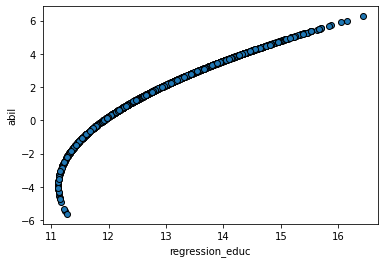

In [32]:
import matplotlib.pyplot as plt
fig = plt.figure
_ = plt.plot(regression_educ, abil, linestyle = "None", marker = "o", markeredgecolor = "black")
_ = plt.xlabel("regression_educ")
_ = plt.ylabel("abil")
plt.show()

# Wooldrige Chap6_ex.6.2

In [33]:
#讀入hprice2資料
import pandas as pd
import numpy as np
hprice= pd.read_csv("hprice2.csv")
hprice.head()

price  crime   nox  rooms  dist  radial    proptax    stratio  lowstat  \
0  24000  0.006  5.38   6.57  4.09       1  29.600000  15.300000     4.98   
1  21599  0.027  4.69   6.42  4.97       2  24.200001  17.799999     9.14   
2  34700  0.027  4.69   7.18  4.97       2  24.200001  17.799999     4.03   
3  33400  0.032  4.58   7.00  6.06       3  22.200001  18.700001     2.94   
4  36199  0.069  4.58   7.15  6.06       3  22.200001  18.700001     5.33   

      lprice      lnox  lproptax  
0  10.085809  1.682688  5.690360  
1   9.980402  1.545433  5.488938  
2  10.454495  1.545433  5.488938  
3  10.416311  1.521699  5.402678  
4  10.496787  1.521699  5.402678

In [34]:
#呼叫DataFrame內的price、nox、dist、rooms、stratio
price=pd.concat([hprice.price])
nox=pd.concat([hprice.nox])
dist=pd.concat([hprice.dist])
rooms=pd.concat([hprice.rooms])
stratio=pd.concat([hprice.stratio])
log_price=np.log(price)
log_nox=np.log(nox)
log_dist=np.log(dist)
rsqr=rooms*rooms

In [91]:
# 迴歸分析 應變數是log_price 自變數是log_nox,log_dist,rooms,rsqr,stratio
pairf=pd.concat([log_nox,log_dist,rooms,rsqr,stratio],axis = 1)
model=sm.OLS(log_price,sm.add_constant(pairf)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     151.8
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           7.89e-98
Time:                        08:36:03   Log-Likelihood:                -31.806
No. Observations:                 506   AIC:                             75.61
Df Residuals:                     500   BIC:                             101.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3855      0.566     23.630      0.0

In [35]:
# 迴歸分析 應變數是log_price 自變數是log_nox,log_dist,rooms,stratio
pairf=pd.concat([log_nox,log_dist,rooms,stratio],axis = 1)
model=sm.OLS(log_price,sm.add_constant(pairf)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     175.9
Date:                Sun, 16 May 2021   Prob (F-statistic):           5.53e-94
Time:                        16:06:57   Log-Likelihood:                -43.495
No. Observations:                 506   AIC:                             96.99
Df Residuals:                     501   BIC:                             118.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0839      0.318     34.843      0.0

In [36]:
#x=abs/ (beta_1/2*beta_2) /
x=abs(0.545/(2*0.062))
round(x,2)

4.4

In [37]:
#當rooms=6.45，效果為25.5%
delta_price=-54.5+12.4*6.45
#當rooms=7，效果為32.3%
delta_price_1=-54.5+12.4*7
print("delta_price",round(delta_price,1),"delta_price_1",delta_price_1)

delta_price 25.5 delta_price_1 32.3


# Wooldrige Chap6_c6.2

In [38]:
#讀入Wage1資料
import pandas as pd
import numpy as np
wage1= pd.read_csv("wage1.csv")
wage1.head()

wage  educ  exper  tenure  nonwhite  female  married  numdep  smsa  \
0  3.10    11      2       0         0       1        0       2     1   
1  3.24    12     22       2         0       1        1       3     1   
2  3.00    11      2       0         0       0        0       2     0   
3  6.00     8     44      28         0       0        1       0     1   
4  5.30    12      7       2         0       0        1       1     0   

   northcen  ...  trcommpu  trade  services  profserv  profocc  clerocc  \
0         0  ...         0      0         0         0        0        0   
1         0  ...         0      0         1         0        0        0   
2         0  ...         0      1         0         0        0        0   
3         0  ...         0      0         0         0        0        1   
4         0  ...         0      0         0         0        0        0   

   servocc     lwage  expersq  tenursq  
0        0  1.131402        4        0  
1        1  1.175573      484        4  
2        0  1.098612        4        0  
3        0  1.791759     1936      784  
4        0  1.667707       49        4  

[5 rows x 24 columns]

In [105]:
# 迴歸分析 應變數是log_wage 自變數是educ,exper,esqur
wage=pd.concat([wage1.wage])
exper=pd.concat([wage1.exper])
esqur=exper*exper
log_wage=np.log(wage)
pairf=pd.concat([wage1.educ,exper,esqur],axis = 1)
model=sm.OLS(log_wage,sm.add_constant(pairf)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     74.67
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           3.38e-40
Time:                        09:12:49   Log-Likelihood:                -319.53
No. Observations:                 526   AIC:                             647.1
Df Residuals:                     522   BIC:                             664.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1280      0.106      1.208      0.2

In [39]:
#近似公式，%delta_wage=100(beta_2+2*beta_3*exper)*delta_exper
#%delta_wage=100(0.0410-2*0.000714*exper)*delta_exper
#求第5年經驗近似報酬，exper=4，增加exper=1
delta_wage_5year=100*(0.0410-2*0.000714*4)*1
delta_wage_5year
#求第20年經驗近似報酬，exper=19，增加exper=1
delta_wage_20year=100*(0.0410-2*0.000714*19)*1
print('delta_wage_5year',round(delta_wage_5year,2),'delta_wage_20year',round(delta_wage_20year,2))

delta_wage_5year 3.53 delta_wage_20year 1.39


In [40]:
#多1年經驗會降低預測log(wage)的exper值
#x=abs/ (beta_1/2*beta_2) /
x=abs(0.041/(2*0.000714))
print('reduce_log_wage_1_year',round(x,2))

reduce_log_wage_1_year 28.71


In [41]:
fliter_wage = (wage1['exper'] >28.71)
wage1[fliter_wage]
#樣本中共121個人經驗比28.71高

wage  educ  exper  tenure  nonwhite  female  married  numdep  smsa  \
3     6.000000     8     44      28         0       0        1       0     1   
14   22.200001    12     31      15         0       0        1       1     1   
19    4.500000    12     36       6         0       1        1       0     1   
21    8.480000    12     29      13         0       0        1       3     1   
24    6.000000    11     37       8         1       1        0       0     1   
..         ...   ...    ...     ...       ...     ...      ...     ...   ...   
502   2.890000     0     42       0         0       1        1       2     0   
503   2.900000     5     34       0         0       1        1       5     0   
508   3.500000    12     31       3         1       1        0       1     1   
510   3.000000    12     36       1         1       1        0       0     1   
519   4.750000    13     47       1         0       0        1       0     0   

     northcen  ...  trcommpu  trade  services  profserv  profocc  clerocc  \
3           0  ...         0      0         0         0        0        1   
14          0  ...         0      0         0         0        1        0   
19          0  ...         0      0         0         1        0        0   
21          0  ...         0      0         0         0        0        0   
24          0  ...         0      0         1         0        0        0   
..        ...  ...       ...    ...       ...       ...      ...      ...   
502         0  ...         0      0         1         0        0        0   
503         0  ...         0      0         0         0        0        0   
508         0  ...         0      0         1         0        0        0   
510         0  ...         0      0         1         0        0        0   
519         0  ...         0      1         0         0        0        0   

     servocc     lwage  expersq  tenursq  
3          0  1.791759     1936      784  
14         0  3.100092      961      225  
19         1  1.504077     1296       36  
21         0  2.137710      841      169  
24         0  1.791759     1369       64  
..       ...       ...      ...      ...  
502        0  1.061257     1764        0  
503        0  1.064711     1156        0  
508        0  1.252763      961        9  
510        0  1.098612     1296        1  
519        0  1.558145     2209        1  

[121 rows x 24 columns]

# Wooldrige Chap6_c6.4

In [42]:
#讀入gpa2資料
import pandas as pd
import numpy as np
gpa2= pd.read_csv("gpa2.csv")
gpa2.head()

sat  tothrs  colgpa  athlete  verbmath  hsize  hsrank     hsperc  female  \
0   920      43    2.04        1   0.48387   0.10       4  40.000000       1   
1  1170      18    4.00        0   0.82813   9.40     191  20.319149       0   
2   810      14    1.78        1   0.88372   1.19      42  35.294117       0   
3   940      40    2.42        0   0.80769   5.71     252  44.133099       0   
4  1180      18    2.61        0   0.73529   2.14      86  40.186916       0   

   white  black    hsizesq  
0      0      0   0.010000  
1      1      0  88.360001  
2      1      0   1.416100  
3      1      0  32.604099  
4      1      0   4.579600

In [43]:
# 迴歸分析 應變數是sat 自變數是hsize,hsqr
hsize=pd.concat([gpa2.hsize])
hsqr=hsize*hsize
pairf=pd.concat([hsize,hsqr],axis = 1)
model=sm.OLS(gpa2.sat,sm.add_constant(pairf)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    sat   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     15.93
Date:                Sun, 16 May 2021   Prob (F-statistic):           1.28e-07
Time:                        16:07:07   Log-Likelihood:                -26280.
No. Observations:                4137   AIC:                         5.257e+04
Df Residuals:                    4134   BIC:                         5.258e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        997.9805      6.203    160.875      0.0

In [44]:
#最適之高中大小
#x=abs/ (beta_1/2*beta_2) /
hsize=19.81/(2*2.13)
round(hsize,2)

4.65

In [178]:
# 迴歸分析 應變數是log_sat 自變數是hsize,hsqr
hsize=pd.concat([gpa2.hsize])
sat=pd.concat([gpa2.sat])
log_sat=np.log(sat)
hsqr=hsize*hsize
pairf=pd.concat([hsize,hsqr],axis = 1)
model=sm.OLS(log_sat,sm.add_constant(pairf)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    sat   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     16.19
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           9.89e-08
Time:                        13:12:19   Log-Likelihood:                 2332.6
No. Observations:                4137   AIC:                            -4659.
Df Residuals:                    4134   BIC:                            -4640.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8960      0.006   1121.032      0.0

In [45]:
#最適之高中大小
#x=abs/ (beta_1/2*beta_2) /
hsize1=0.0196/(2*0.0021)
round(hsize1,2)

4.67

# Wooldrige Chap9_ex9.2

In [46]:
#讀入hpice1資料
import pandas as pd
import numpy as np
hprice= pd.read_csv("hprice1.csv")
hprice.head()

price      assess  bdrms  lotsize  sqrft  colonial    lprice   lassess  \
0  300.0  349.100006      4     6126   2438         1  5.703783  5.855359   
1  370.0  351.500000      3     9903   2076         1  5.913503  5.862210   
2  191.0  217.699997      3     5200   1374         0  5.252274  5.383118   
3  195.0  231.800003      3     4600   1448         1  5.273000  5.445875   
4  373.0  319.100006      4     6095   2514         1  5.921578  5.765504   

   llotsize    lsqrft  
0  8.720297  7.798934  
1  9.200593  7.638198  
2  8.556414  7.225482  
3  8.433811  7.277938  
4  8.715224  7.829630

In [115]:
# 迴歸分析 應變數price 自變數是lotsize,sqrft,bdrms
pairf=pd.concat([hprice.lotsize,hprice.sqrft,hprice.bdrms],axis = 1)
model=sm.OLS(hprice.price,sm.add_constant(pairf)).fit()
res1 = model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     57.46
Date:                Sun, 16 May 2021   Prob (F-statistic):           2.70e-20
Time:                        16:40:19   Log-Likelihood:                -482.88
No. Observations:                  88   AIC:                             973.8
Df Residuals:                      84   BIC:                             983.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.7703     29.475     -0.739      0.4

In [116]:
# 迴歸分析 應變數log_price 自變數是log_lotsize,log_sqrft,bdrms
price=pd.concat([hprice.price])
lotsize=pd.concat([hprice.lotsize])
sqrft=pd.concat([hprice.sqrft])
bdrms=pd.concat([hprice.bdrms])
log_price=np.log(price)
log_lotsize=np.log(lotsize)
log_sqrft=np.log(sqrft)
pairf=pd.concat([log_lotsize,log_sqrft,bdrms],axis = 1)
model2=sm.OLS(log_price,sm.add_constant(pairf)).fit()
res2 = model2
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     50.42
Date:                Sun, 16 May 2021   Prob (F-statistic):           9.74e-19
Time:                        16:40:21   Log-Likelihood:                 25.861
No. Observations:                  88   AIC:                            -43.72
Df Residuals:                      84   BIC:                            -33.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2970      0.651     -1.992      0.0

In [117]:
import statsmodels
statsmodels.stats.diagnostic.linear_reset(res1,power=3,
                                          test_type='fitted',use_f=bool,cov_type='nonrobust',cov_kwargs=None)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:1263: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[4.66820553]]), p=0.012021711443173879, df_denom=82, df_num=2>

In [118]:
import statsmodels
statsmodels.stats.diagnostic.linear_reset(res2,power=3,
                                          test_type='fitted',use_f=bool,cov_type='nonrobust',cov_kwargs=None)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[2.56504079]]), p=0.08307588975363184, df_denom=82, df_num=2>

In [134]:
#statsmodels.stats.diagnostic.linear_reset
#https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.linear_reset.html

# RESET另外一種寫法

https://www.aptech.com/resources/tutorials/econometrics/ols-diagnostics-model-specification/#reset